## Overview

If you're considering going out to see a movie, how much can you trust online reviews and ratings?

*Especially* if the company posting the rating is *also* making money selling movie tickets.

Does the company tend to overrate movies with better ratings than they should?

Let's determine if Fandango's scores in 2015 were geared towards better film ratings in an effort to sell more tickets.

Source : [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

`fandango_scrape.csv` contains all the movies in the article, from Fandango.

`all_sites_scores.csv` contains all movies that have a Rotten Tomatoes rating, RT User rating, Metacritic rating, Metacritic User rating, IMDb rating, and at least 30 fan reviews on Fandango.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Fandango scores versus real user ratings

In [2]:
fandango = pd.read_csv('fandango_scrape.csv')

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Relationship between the popularity of a film and its rating.

<Axes: xlabel='RATING', ylabel='VOTES'>

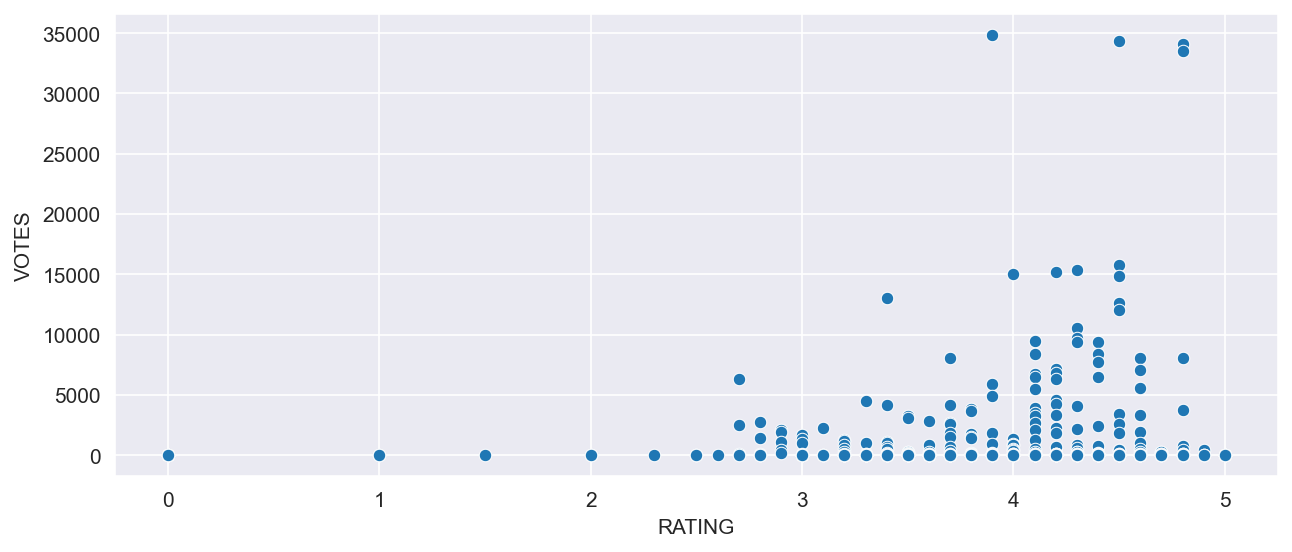

In [6]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango, y="VOTES", x="RATING")

In [7]:
fandango.corr()

/var/folders/r8/zqmq4mj91p1f_0yg_2vxkx_80000gn/T/ipykernel_27219/281981486.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Create a new column containing the year of each film.

In [8]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))

In [9]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

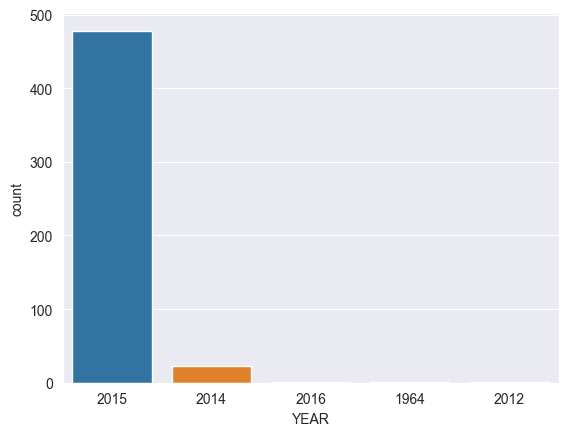

In [10]:
sns.countplot(data=fandango, x="YEAR")

### Vote analysis

In [11]:
fandango.nlargest(10, "VOTES")

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [12]:
sum(fandango["VOTES"] == 0)

69

#### New dataframe without films with no votes

In [13]:
fan_reviewed = fandango[fandango["VOTES"]>0]

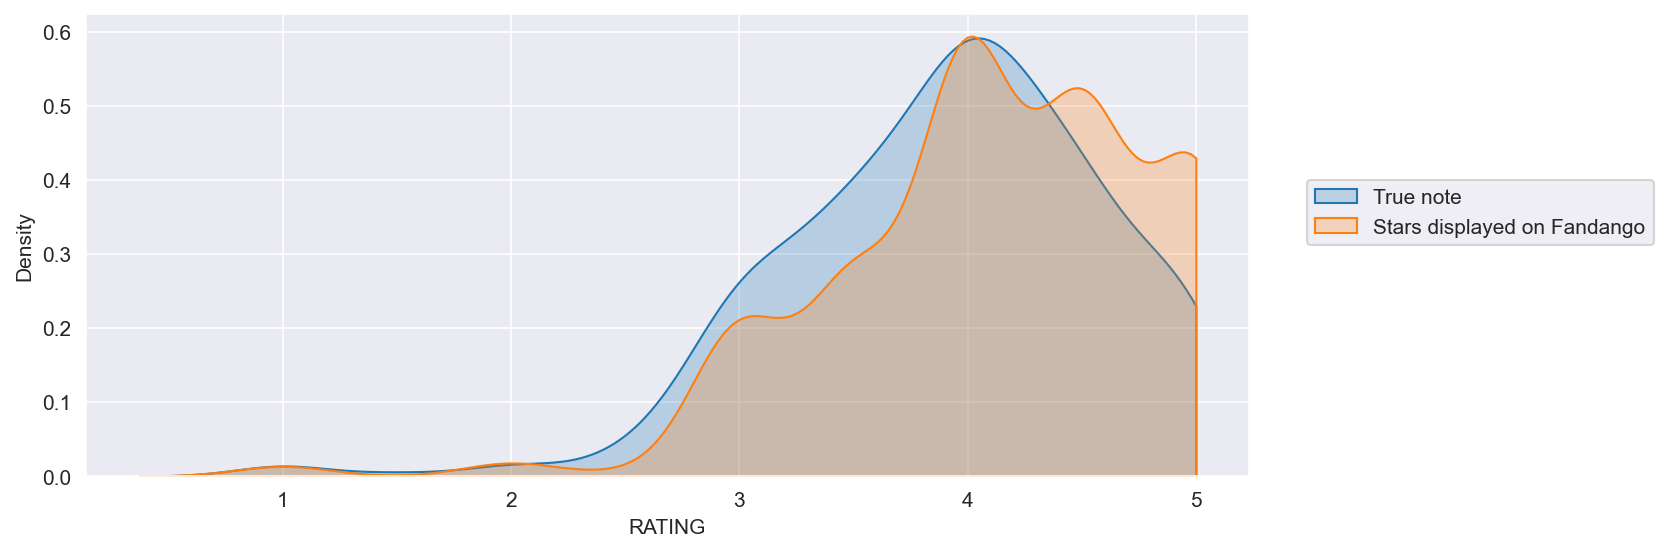

In [14]:
plt.figure(figsize=(10,4), dpi=150)
sns.kdeplot(data=fan_reviewed, x="RATING", clip=[0,5], fill=True, label="True note")
sns.kdeplot(data=fan_reviewed, x="STARS", clip=[0,5], fill=True, label="Stars displayed on Fandango")

plt.legend(loc=(1.05, 0.5))

In [15]:
fan_reviewed['STARS_DIFF'] = (fan_reviewed['STARS'] - fan_reviewed['RATING']).round(2)

/var/folders/r8/zqmq4mj91p1f_0yg_2vxkx_80000gn/T/ipykernel_27219/2496516039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = (fan_reviewed['STARS'] - fan_reviewed['RATING']).round(2)


<Axes: xlabel='STARS_DIFF', ylabel='count'>

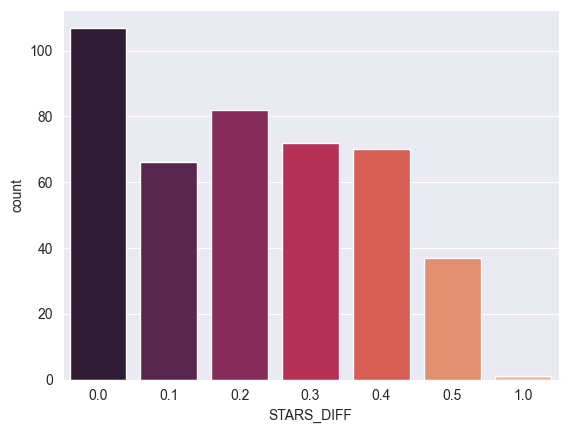

In [16]:
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='rocket')

In [17]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Exploring Fandango scores versus other platforms scores

In [18]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [19]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [20]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [21]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


#### Rotten Tomatoes

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

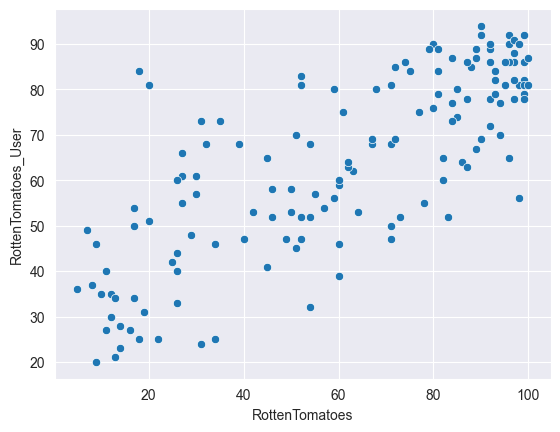

In [22]:
sns.scatterplot(data=all_sites, x="RottenTomatoes", y="RottenTomatoes_User")

In [23]:
all_sites["Rotten_Diff"] = all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]

In [24]:
all_sites["Rotten_Diff"].apply(abs).mean()

15.095890410958905

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

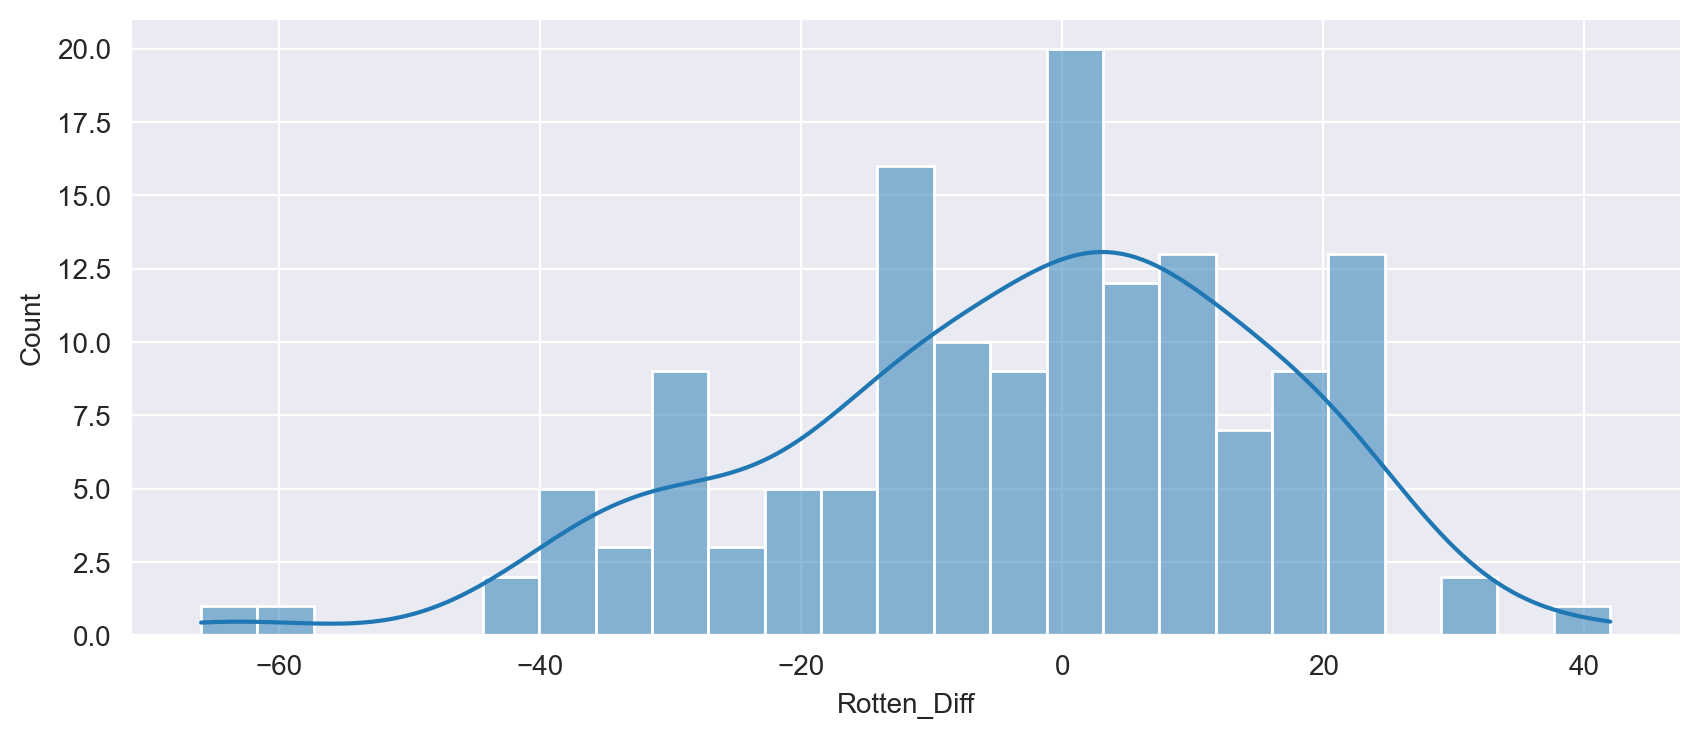

In [25]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=all_sites, x="Rotten_Diff", kde=True, bins=25)

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

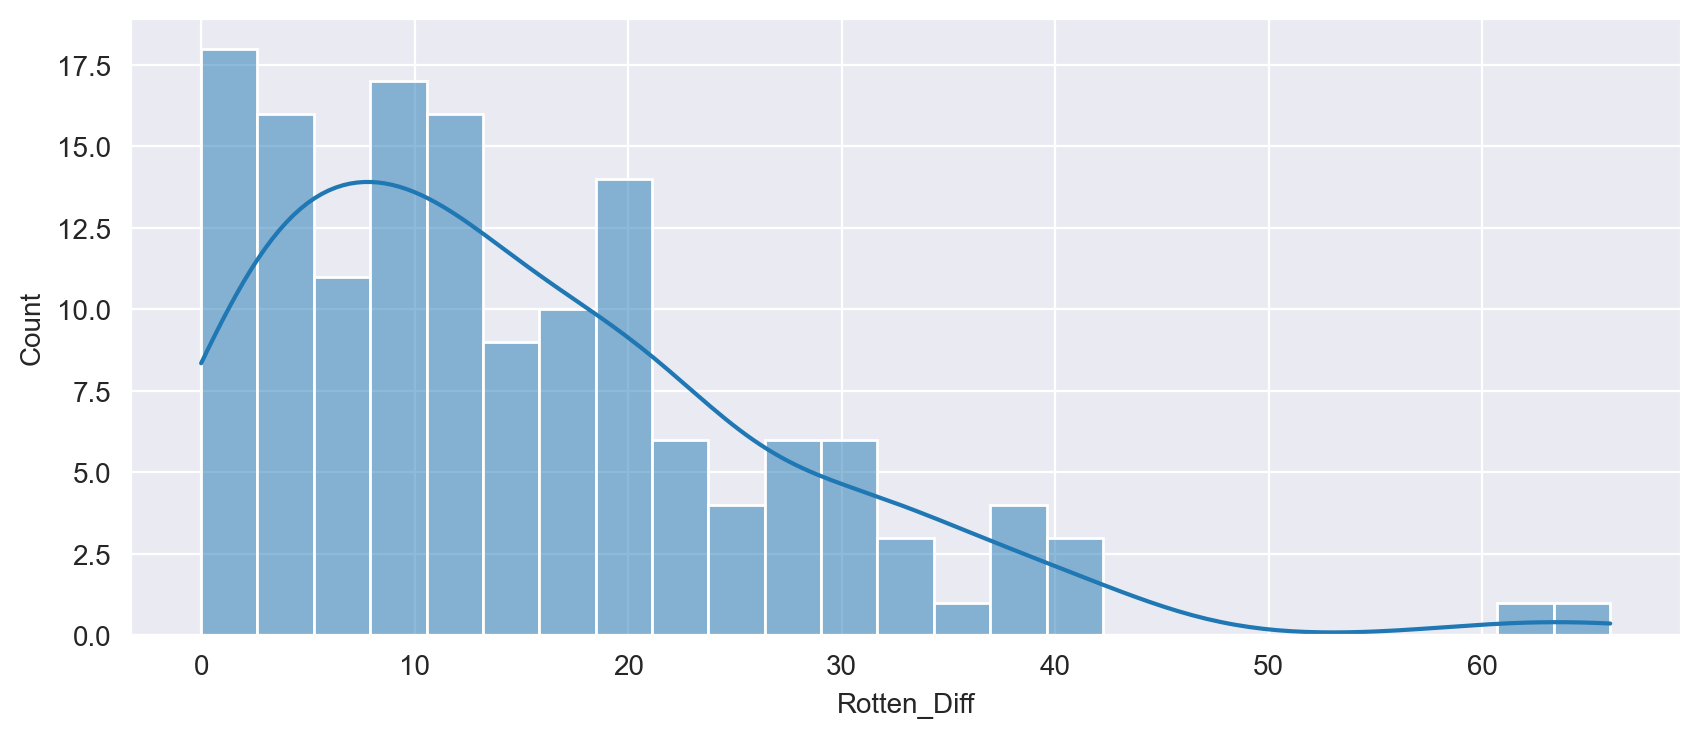

In [26]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(x=all_sites["Rotten_Diff"].apply(abs), kde=True, bins=25)

#### MetaCritic

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

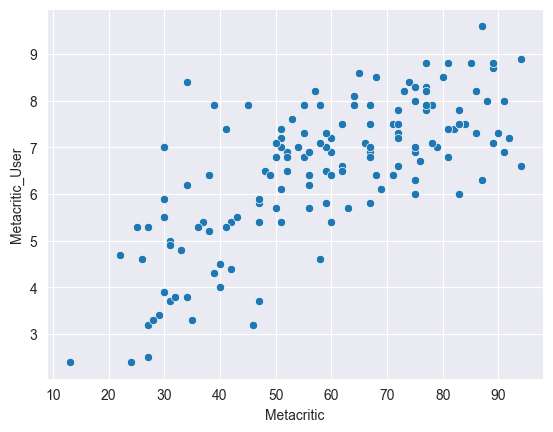

In [27]:
sns.scatterplot(data=all_sites, x="Metacritic", y="Metacritic_User")

### Fandango vs. Other Platforms Ratings

In [42]:
df = pd.merge(fandango, all_sites, on="FILM", how="inner")

In [43]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


Note that RT, MetaCritic and IMDb do not use a score (rating) between 0 and 5 stars like Fandango does. To make a fair comparison, we need to normalize these values so that they all fall between 0 and 5 stars and the relationship between the reviews remains the same.

In [44]:
df['RT_norm'] = np.round(df['RottenTomatoes'] / 20,1)
df['RTU_norm'] = np.round(df['RottenTomatoes_User'] / 20,1)

In [45]:
df['Meta_norm'] = np.round(df['Metacritic'] / 20,1)
df['MetaU_norm'] = np.round(df['Metacritic_User'] / 2,1)

In [46]:
df['IMDB_norm'] = np.round(df['IMDB'] / 2,1)

In [47]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [48]:
norms_scores = df[['STARS', 'RATING', 'RT_norm', 'RTU_norm', 'Meta_norm', 'MetaU_norm', 'IMDB_norm']]

In [49]:
norms_scores

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


<Axes: ylabel='Density'>

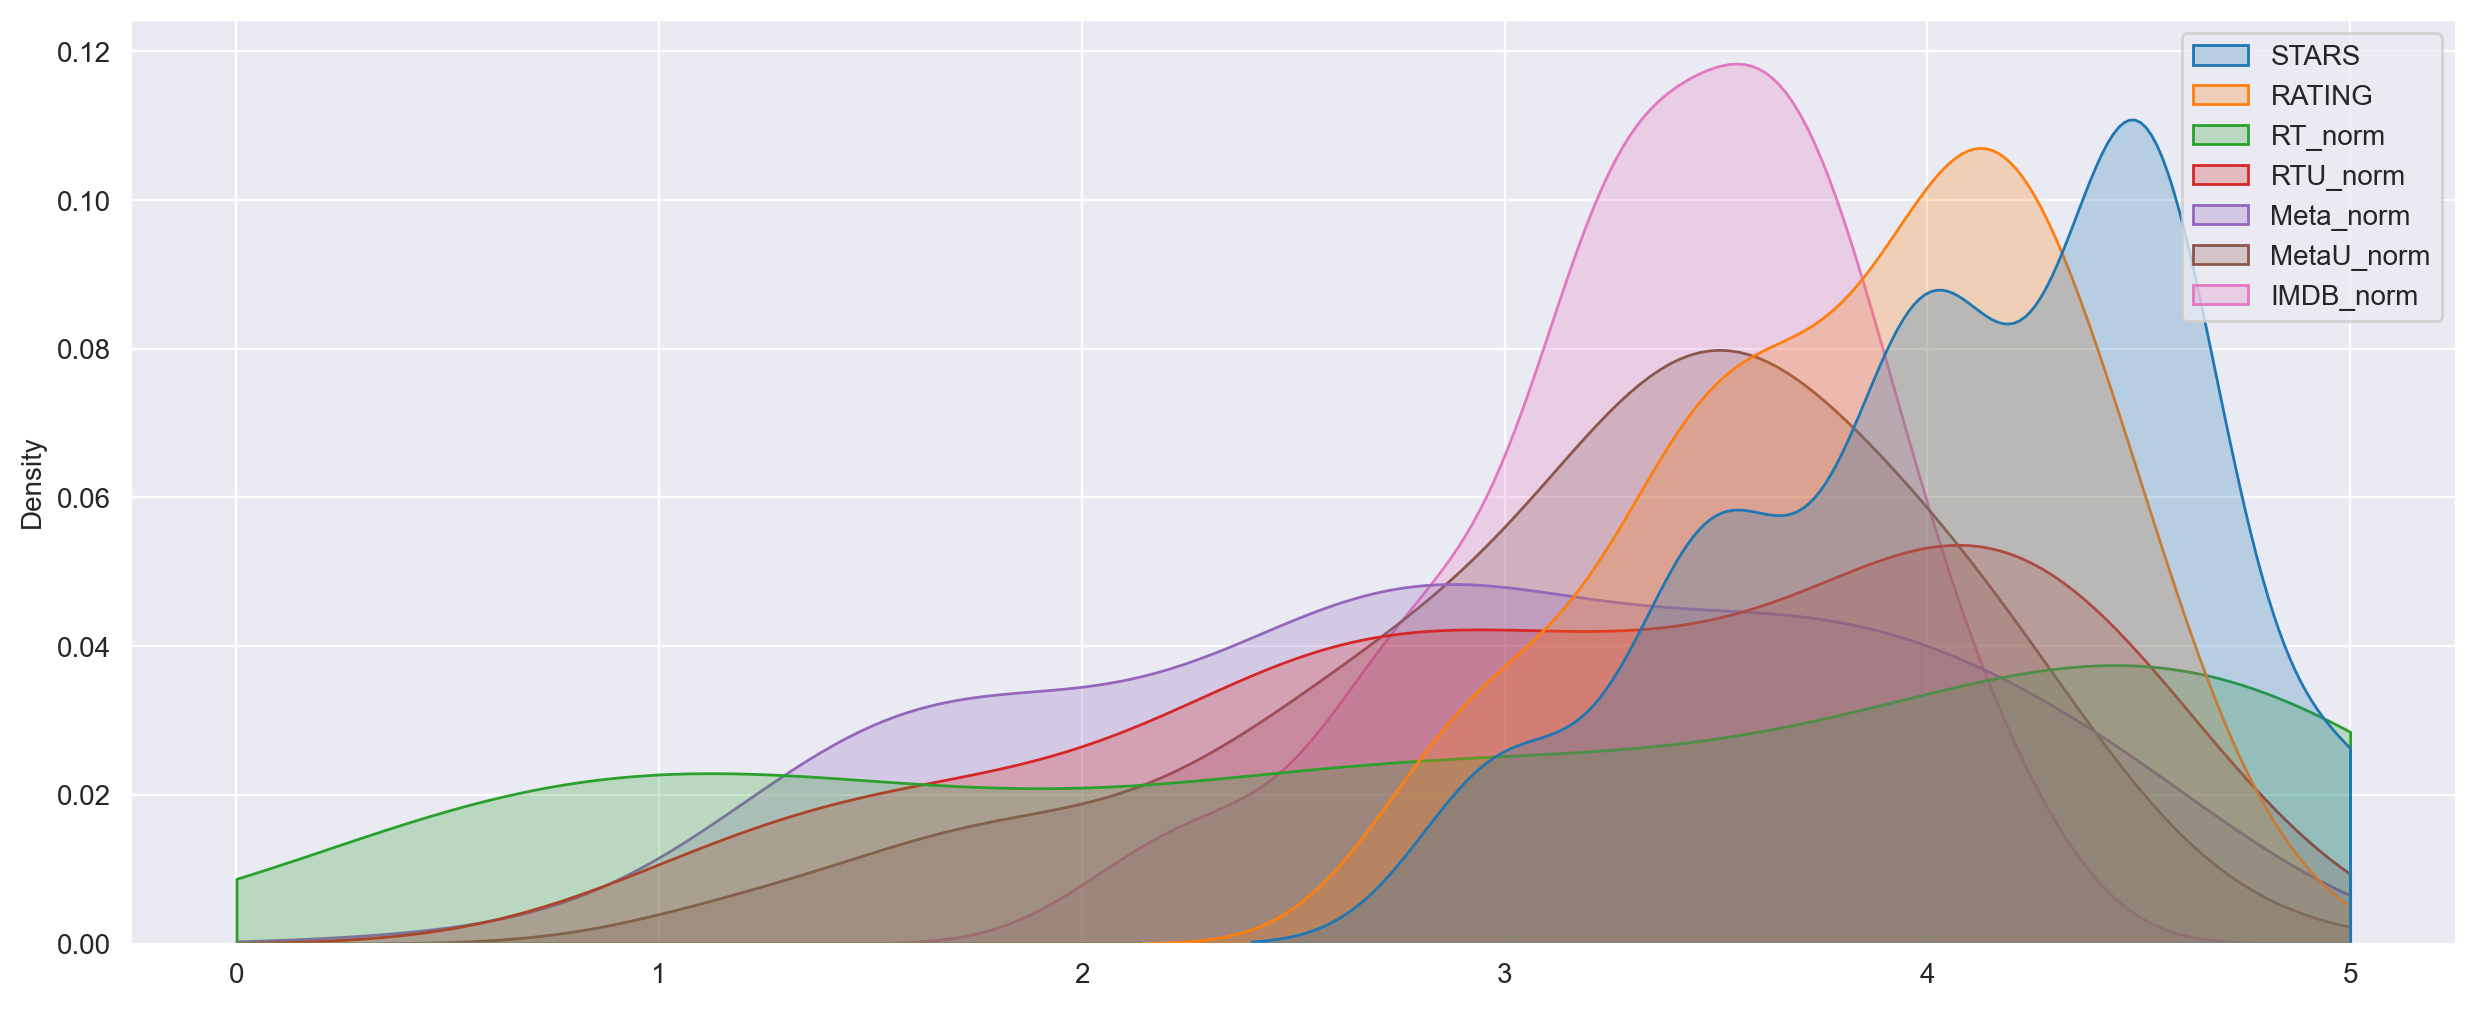

In [50]:
plt.figure(figsize=(15,6), dpi=200)
sns.kdeplot(data=norms_scores, clip=[0,5], fill=True)

It is clear that the distribution of Fandango is uneven. We can also see that Rotten Tomatoes reviews have the most uniform distribution. Let's compare these two directly.

<Axes: ylabel='Density'>

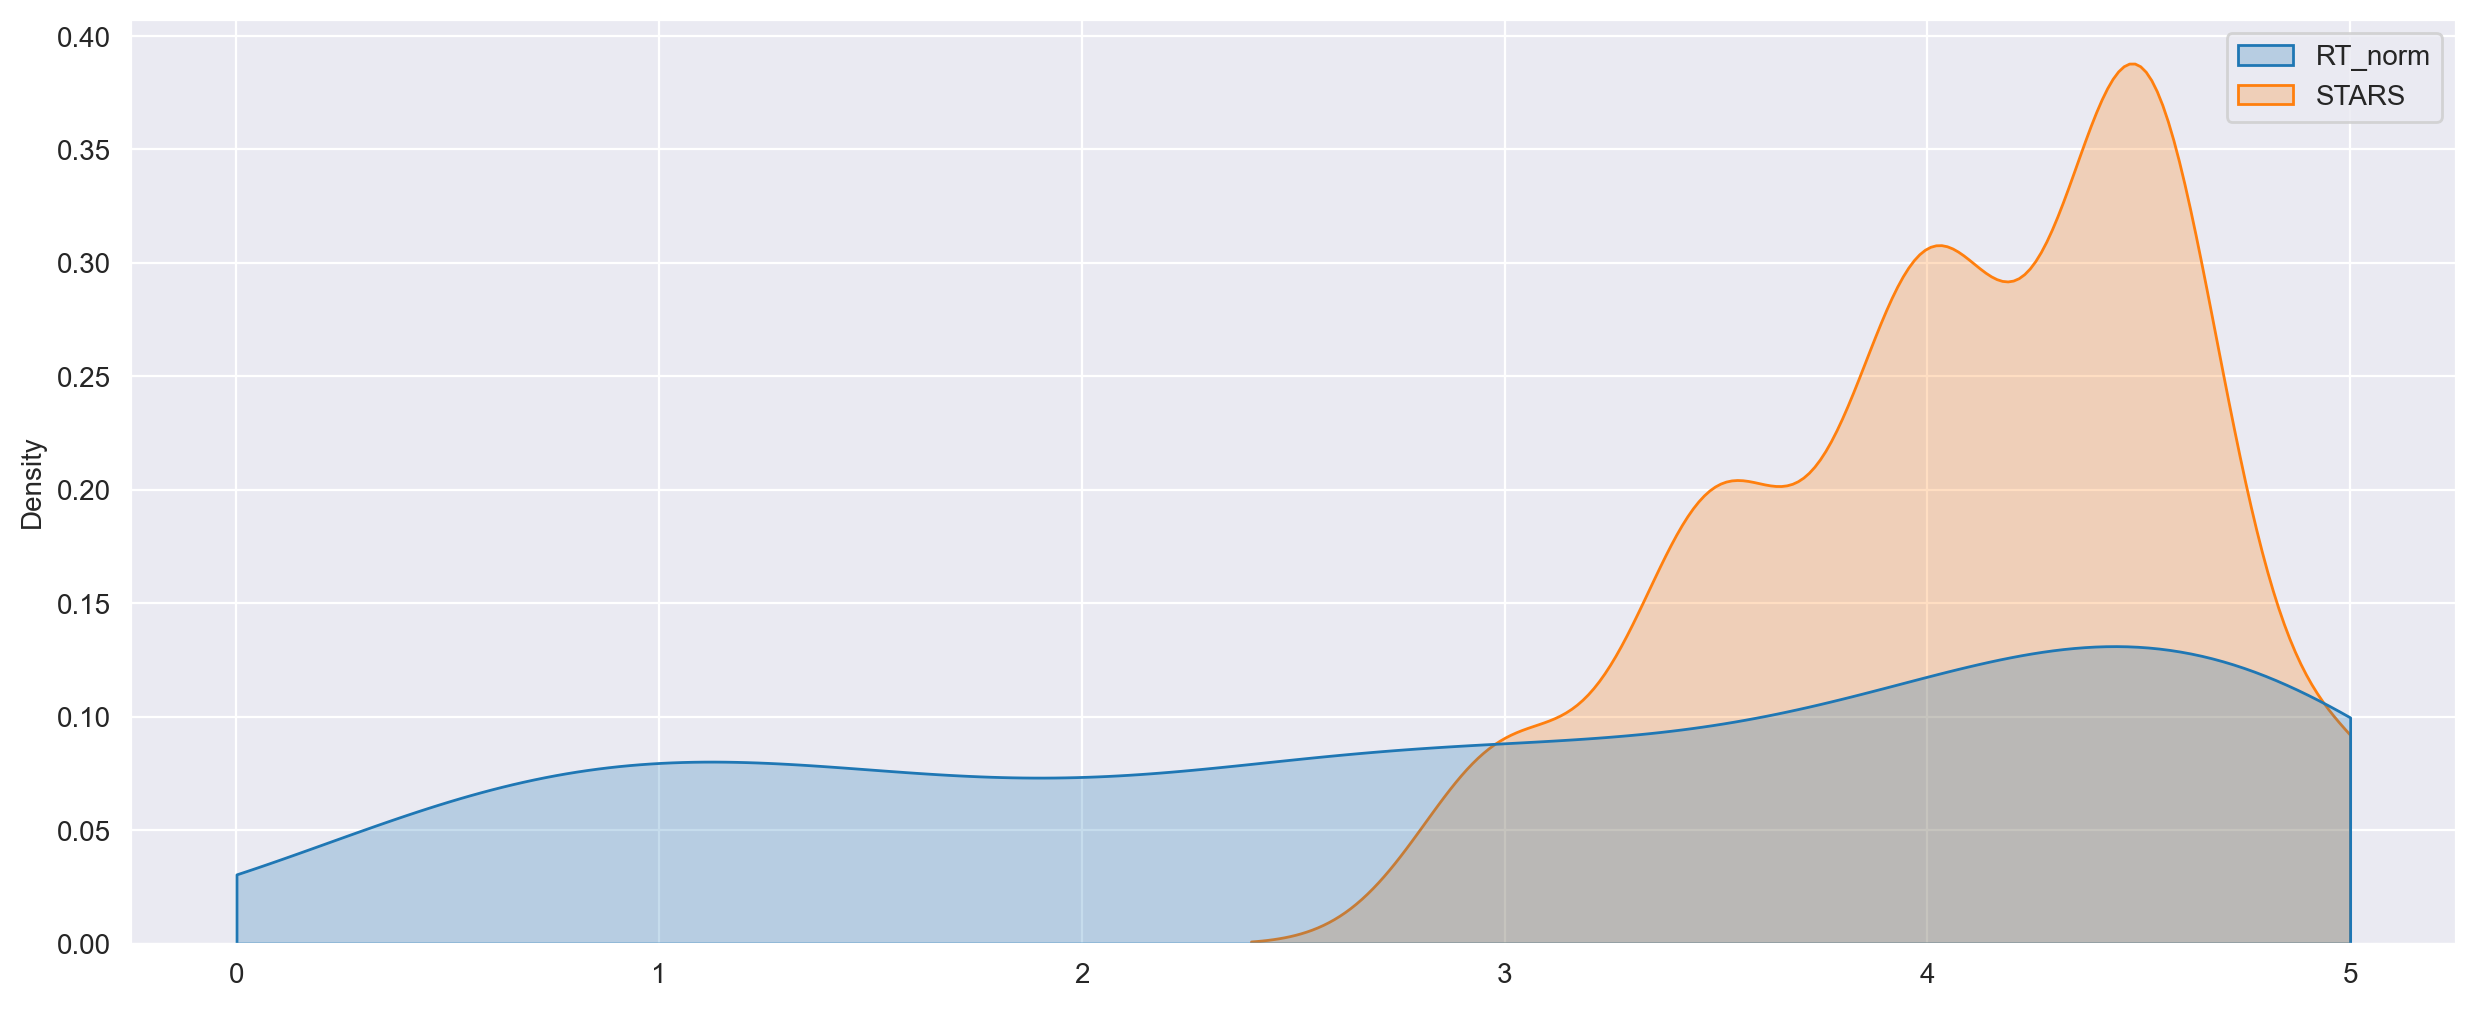

In [51]:
plt.figure(figsize=(15,6), dpi=200)
sns.kdeplot(data=norms_scores[['RT_norm', 'STARS']], clip=[0,5], fill=True)

### How are the worst movies rated on all platforms?

In [52]:
import scipy

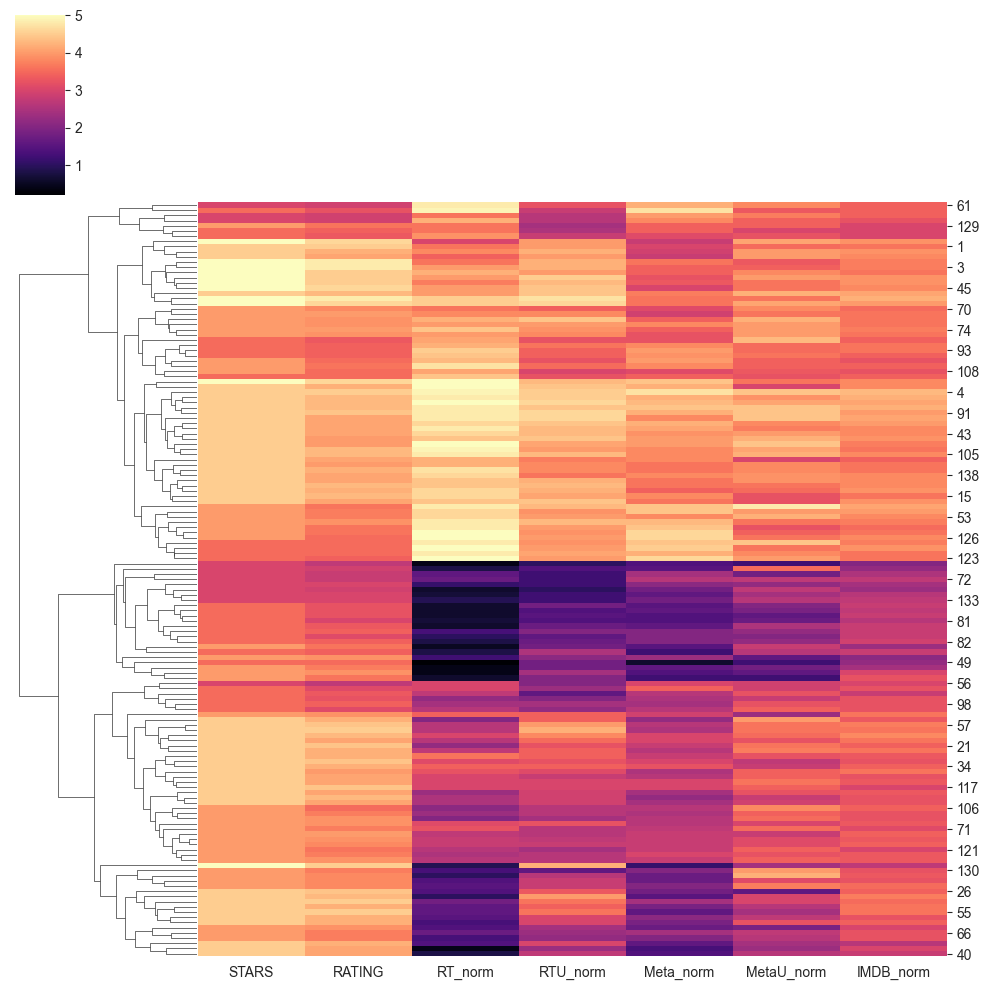

In [53]:
sns.clustermap(norms_scores, cmap="magma", col_cluster=False)

It's clear that Fandango rates movies much more generously than other platforms, especially considering that it then displays a rounded version of its rating.

In [57]:
norm_films = df[['STARS','RATING','RT_norm','RTU_norm','Meta_norm','MetaU_norm','IMDB_norm','FILM']]

In [59]:
norm_films.nsmallest(10,'RT_norm')

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Text(0.5, 1.0, 'Ratings from each platform for the 10 worst rated films by RT critics')

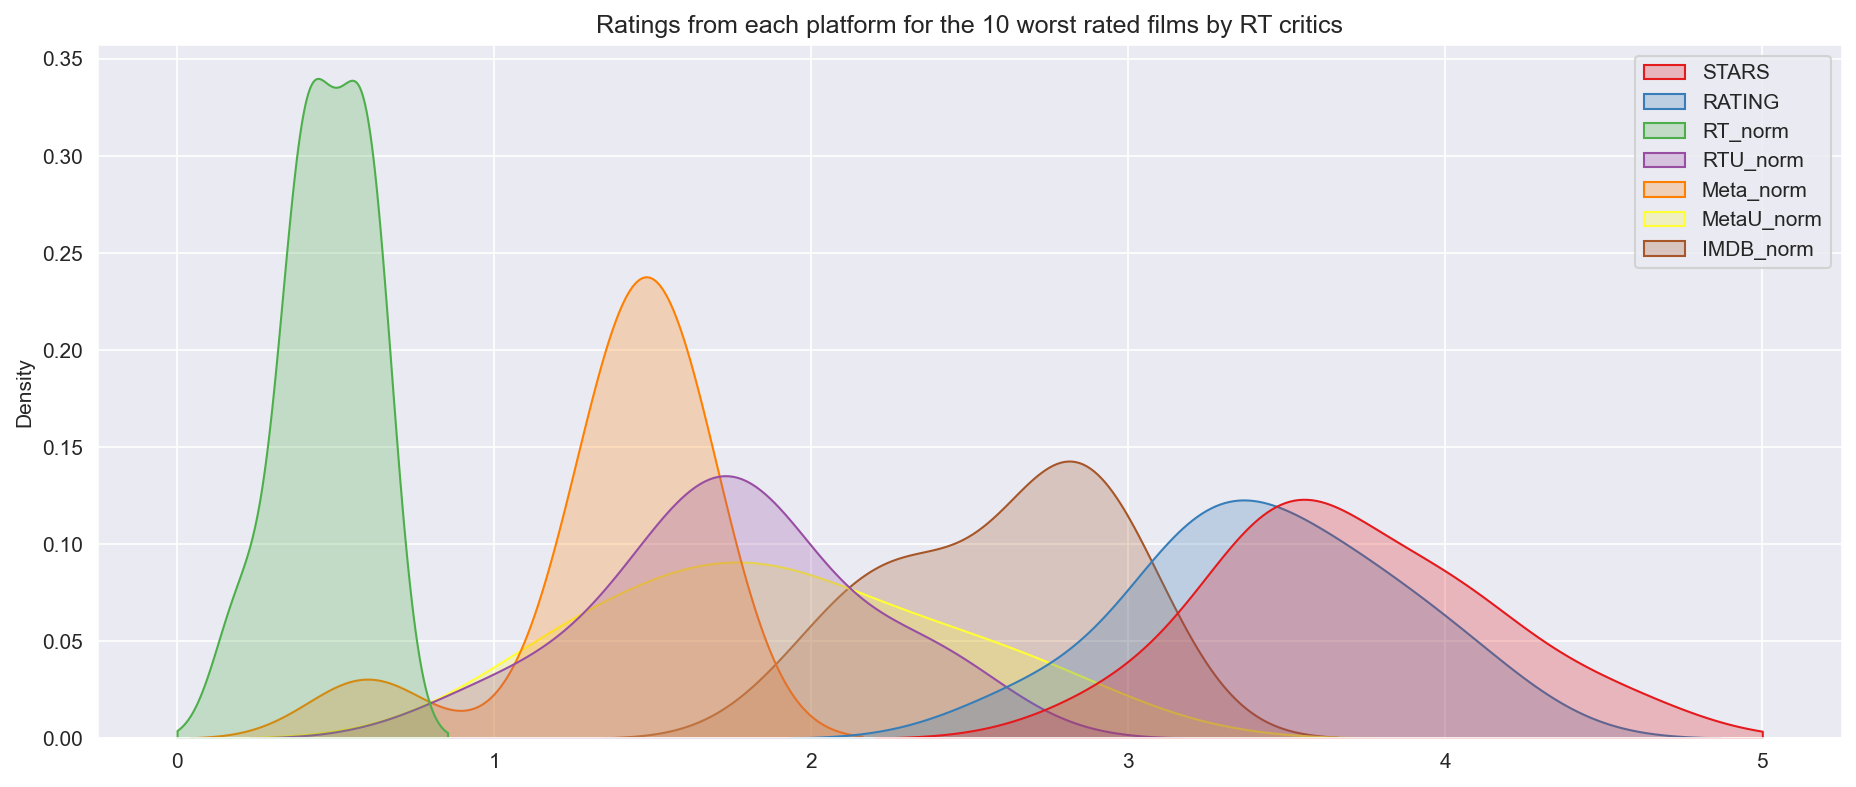

In [63]:
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],fill=True,palette='Set1')
plt.title("Ratings from each platform for the 10 worst rated films by RT critics")

**Fandango shows about 3 to 4 stars for movies that are clearly bad according to other platforms!**